<a href="https://colab.research.google.com/github/EAsencios/DEEP-LEARING/blob/master/linear_regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [8]:
# import dataset
training_df = pd.read_csv("/content/sample_data/california_housing_train.csv")
# scale the label.
training_df['median_house_value']/=1000
training_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111.4
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103.6
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85.8


In [9]:
# get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [16]:
training_df[(training_df['total_rooms']<10) | (training_df['total_bedrooms']<2) | (training_df['median_house_value']<20)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14.999
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137.500
3226,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14.999
7182,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17.500
16309,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500.001
16643,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14.999
16801,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14.999


Defined create_model and train_model


In [28]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [33]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")


Defined the plot_the_model and plot_the_loss_curve functions.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 129715.5000 - root_mean_squared_error: 360.1604
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 27941.7051 - root_mean_squared_error: 167.1577
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27082.2949 - root_mean_squared_error: 164.5670
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26416.6484 - root_mean_squared_error: 162.5320
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25633.1504 - root_mean_squared_error: 160.1036
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 24980.2969 - root_mean_squared_error: 158.0516
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24463.3926 - root_mean_squared_error: 156.4078
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23929.2207 - root_mean_squared_error: 154.6907
Epoch 9/30
567/567 [===========

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


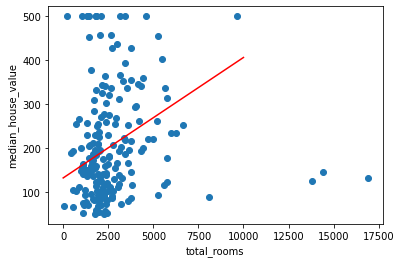

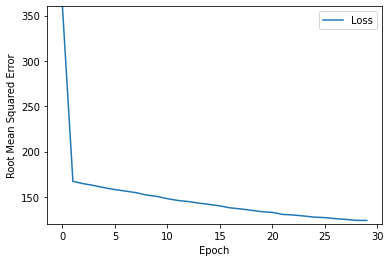

In [34]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms" # the total number of rooms on a specific city block.
my_label = "median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based.
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

print("\nThe learned weight for your model is %.4f"% weight)
print("The learined bias for your model is %.4f"% bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [35]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [36]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             186
 3400     92             225
 3677     69             233
 2202     62             192
 2403     80             198
 5652    295             287
 3318    500             223
 2552    342             202
 1364    118             169
 3468    128             227


In [49]:
m = training_df[my_feature][10000:10010]
predicted_values = my_model.predict_on_batch(x=m)
predicted_values

array([[185.56683],
       [225.09203],
       [232.69513],
       [192.20926],
       [197.72632],
       [286.90503],
       [222.84128],
       [201.81609],
       [169.20781],
       [226.9585 ]], dtype=float32)

In [63]:
for i in range(10):
  print("%.0f, %.0f, %.0f" % (
    training_df[my_feature][10000 + i],
    training_df[my_label][10000 + i],
    predicted_values[i][0] ))


1960, 53, 186
3400, 92, 225
3677, 69, 233
2202, 62, 192
2403, 80, 198
5652, 295, 287
3318, 500, 223
2552, 342, 202
1364, 118, 169
3468, 128, 227


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/3
142/142 [==============================] - 1s 1ms/step - loss: 3238714.5000 - root_mean_squared_error: 1799.6428
Epoch 2/3
142/142 [==============================] - 0s 1ms/step - loss: 3137261.5000 - root_mean_squared_error: 1771.2317
Epoch 3/3
142/142 [==============================] - 0s 1ms/step - loss: 3100881.0000 - root_mean_squared_error: 1760.9319


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


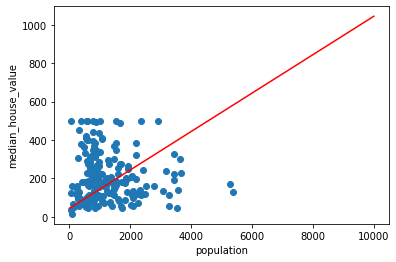

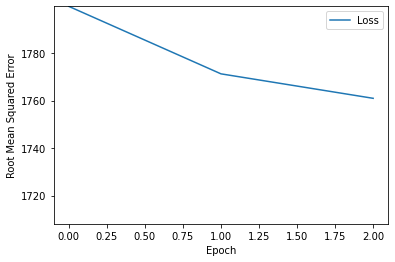

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             173
 1867     92             231
 2191     69             263
 1052     62             149
 1647     80             209
 2312    295             275
 1604    500             205
 1066    342             151
  338    118              78
 1604    128             205
 1200    187             164
  292     80              73
 2014    112             246
 1817     95             226
 1328     69             177


In [64]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

In [68]:
training_df['rooms_per_person'] = training_df['total_rooms']/training_df['population']
training_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,density,rooms_per_person
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9,5.529064,5.529064
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1,6.775908,6.775908
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7,2.162162,2.162162
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4,2.914563,2.914563
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5,2.330128,2.330128
...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111.4,2.444322,2.444322
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79.0,1.967337,1.967337
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103.6,2.151929,2.151929
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85.8,2.058552,2.058552


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 51783.9414 - root_mean_squared_error: 227.5609
Epoch 2/100
131/131 [==============================] - 0s 3ms/step - loss: 42948.8750 - root_mean_squared_error: 207.2411
Epoch 3/100
131/131 [==============================] - 1s 4ms/step - loss: 35421.5820 - root_mean_squared_error: 188.2062
Epoch 4/100
131/131 [==============================] - 1s 4ms/step - loss: 29194.9355 - root_mean_squared_error: 170.8652
Epoch 5/100
131/131 [==============================] - 0s 4ms/step - loss: 24230.2539 - root_mean_squared_error: 155.6607
Epoch 6/100
131/131 [==============================] - 0s 3ms/step - loss: 20609.0645 - root_mean_squared_error: 143.5586
Epoch 7/100
131/131 [==============================] - 0s 4ms/step - loss: 18117.7656 - root_mean_squared_error: 134.6022
Epoch 8/100
131/131 [==============================] - 1s 5ms/step - loss: 16520.8828 - root_mean_squared_error: 128.5336
Epoch 9/100
131/131 [===

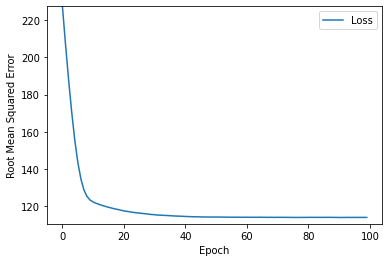

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             194
    2     92             202
    2     69             199
    2     62             210
    1     80             193
    2    295             219
    2    500             209
    2    342             218
    4    118             263
    2    128             212
    2    187             219
    3     80             226
    2    112             219
    2     95             215
    2     69             209


In [81]:
# Define a synthetic feature named rooms_per_person
#training_df["rooms_per_person"] =  # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = .06
epochs = 100
batch_size = 130

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [82]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,density,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969,0.206969
density,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000,1.000000
